In [10]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras import Sequential
from keras.datasets import cifar10
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from tensorflow.keras.utils import to_categorical

In [8]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, x_test = X_train / 255.0, X_test / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

In [19]:
label = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [11]:
model = keras.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 20s 6ms/step - loss: 1.5142 - accuracy: 0.4515 - val_loss: 283.2822 - val_accuracy: 0.3439
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1403 - accuracy: 0.5958 - val_loss: 224.3876 - val_accuracy: 0.4201
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9666 - accuracy: 0.6631 - val_loss: 198.0429 - val_accuracy: 0.4742
Epoch 4/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.8662 - accuracy: 0.6973 - val_loss: 174.9053 - val_accuracy: 0.4818
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7865 - accuracy: 0.7255 - val_loss: 170.7453 - val_accuracy: 0.5041
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7187 - accuracy: 0.7475 - val_loss: 171.7470 - val_accuracy: 0.4905
Epoch 7/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.6701 - accuracy: 0.7656 - val_loss: 226.7966 

In [14]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [15]:
y_pred_round = [np.argmax(i) for i in y_pred]

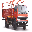

In [17]:
from keras.utils import load_img,img_to_array
test = load_img('/content/103642063.jpeg',target_size = (32,32))
test


In [18]:
test = img_to_array(test)
test = np.expand_dims(test,axis = 0)
test.shape

(1, 32, 32, 3)

In [20]:
test = test/255.

In [21]:
result = model.predict(test)

1/1 [==============================] - 0s 171ms/step


In [24]:
np.argmax(result)

9

In [22]:
label[np.argmax(result)]

'truck'

In [25]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 271.9843 - accuracy: 0.4545
Test accuracy: 0.4544999897480011


In [26]:
model.save('jhay_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
from google.colab import files
files.download('jhay_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>